In [1]:
import sqlite3
import pandas as pd
pd.options.display.max_rows = 999

# Consultar datos
conn = sqlite3.connect('sp500_2.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM acciones")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df = pd.DataFrame(filas, columns=column_names)
df.head(3)

,id,address1,address2,fax,prevName,ipoExpectedDate,city,state,zip,country,...,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,cryptoTradeable,displayName,trailingPegRatio
0,1,3M Center,None,None,None,None,Saint Paul,MN,55144-1000,United States,...,-4.572601,-0.030604,13.741852,0.104821,15.0,0.0,2.2 - Buy,None,None,2.6157
1,2,11270 West Park Place,Suite 170,None,None,None,Milwaukee,WI,53224,United States,...,-1.777603,-0.026379,-10.458702,-0.137490,15.0,0.0,2.5 - Buy,None,A. O. Smith,1.6419
2,3,100 Abbott Park Road,Abbott Park,None,None,None,North Chicago,IL,60064-6400,United States,...,1.102402,0.008498,14.417656,0.123861,15.0,0.0,1.8 - Buy,None,None,NaN


In [2]:
df = df.drop(df[df["beta"].isna()].index)  # Eliminar filas con valores nulos en shortName
df.isna().sum()  # Verificar si hay valores nulos

id                                     0
address1                               0
address2                             345
fax                                  393
prevName                             464
ipoExpectedDate                      453
city                                   0
state                                 16
zip                                    2
country                                0
phone                                  0
website                                0
industry                               0
industryKey                            0
industryDisp                           0
sector                                 0
sectorKey                              0
sectorDisp                             0
longBusinessSummary                    0
fullTimeEmployees                      6
auditRisk                              5
boardRisk                              5
compensationRisk                       5
shareHolderRightsRisk                  5
overallRisk     

In [3]:

df = df.fillna(0)  # Reemplazar valores nulos por 0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22424\3958176581.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)  # Reemplazar valores nulos por 0


In [4]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.head()

,id,prevName,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,compensationAsOfEpochDate,...,epsCurrentYear,priceEpsCurrentYear,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,sourceInterval,exchangeDataDelayedBy,cryptoTradeable,trailingPegRatio
0,1,0,61500.0,1.0,8.0,10.0,4.0,9.0,1.740787e+09,1.735603e+09,...,7.80713,18.552273,-4.572601,-0.030604,13.741852,0.104821,15.0,0.0,0,2.6157
1,2,0,12700.0,5.0,10.0,7.0,10.0,10.0,1.740787e+09,1.735603e+09,...,3.77004,17.402998,-1.777603,-0.026379,-10.458702,-0.137490,15.0,0.0,0,1.6419
2,3,0,114000.0,7.0,7.0,9.0,2.0,6.0,1.740787e+09,1.672445e+09,...,5.14792,25.412207,1.102402,0.008498,14.417656,0.123861,15.0,0.0,0,0.0000
3,4,0,55000.0,4.0,4.0,3.0,9.0,7.0,1.740787e+09,1.735603e+09,...,12.27788,16.720314,8.147797,0.041330,18.421738,0.098581,15.0,0.0,0,0.4298
4,5,0,801000.0,1.0,4.0,4.0,4.0,2.0,1.740787e+09,1.735603e+09,...,12.73943,23.888823,-49.911407,-0.140897,-39.781310,-0.115606,15.0,0.0,0,2.5777


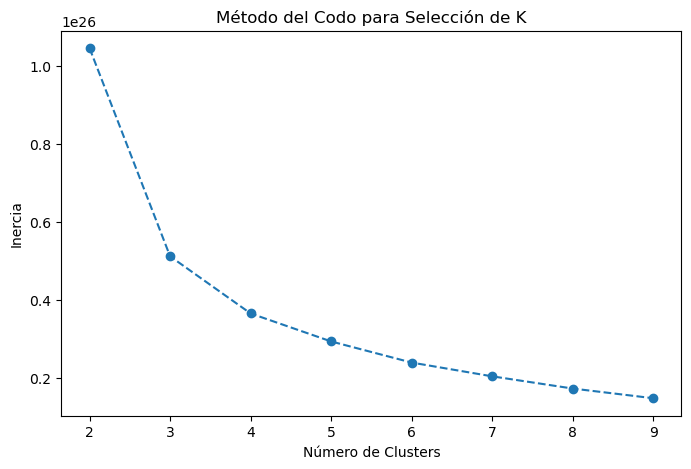

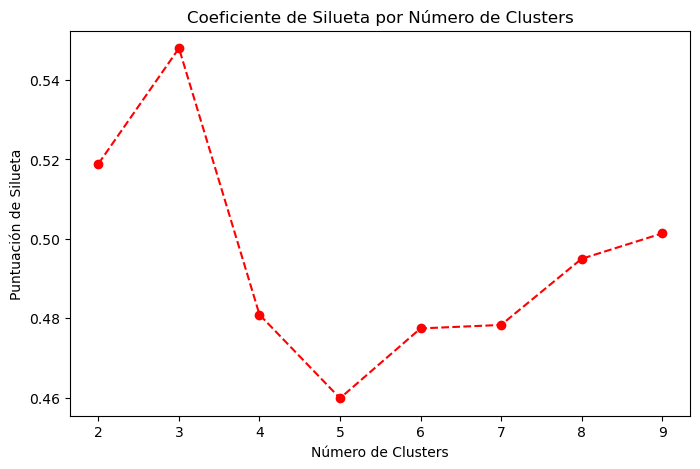

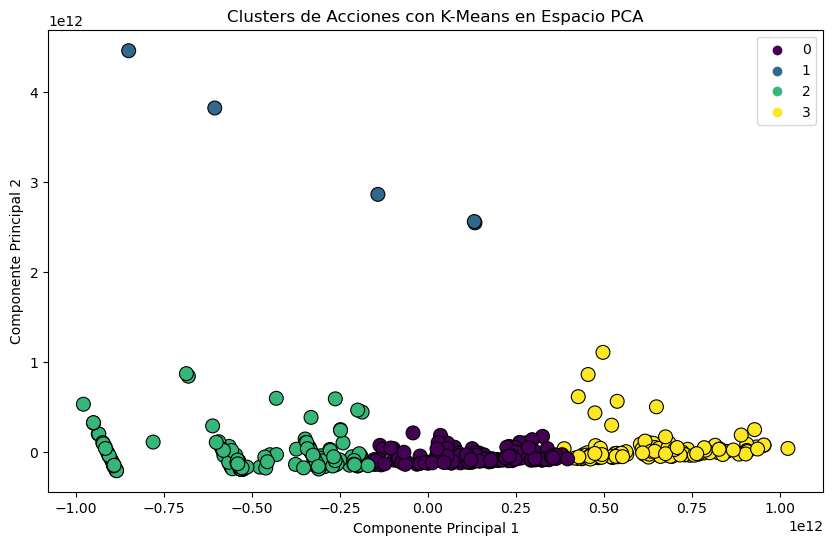

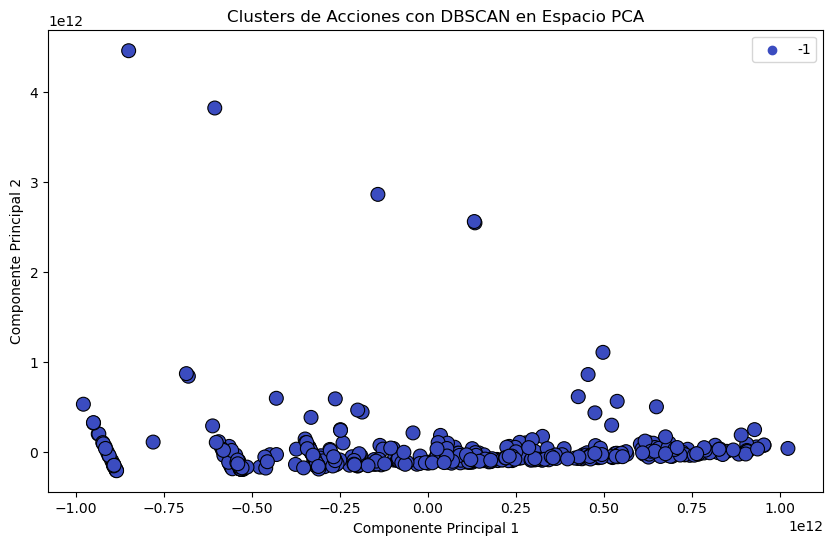

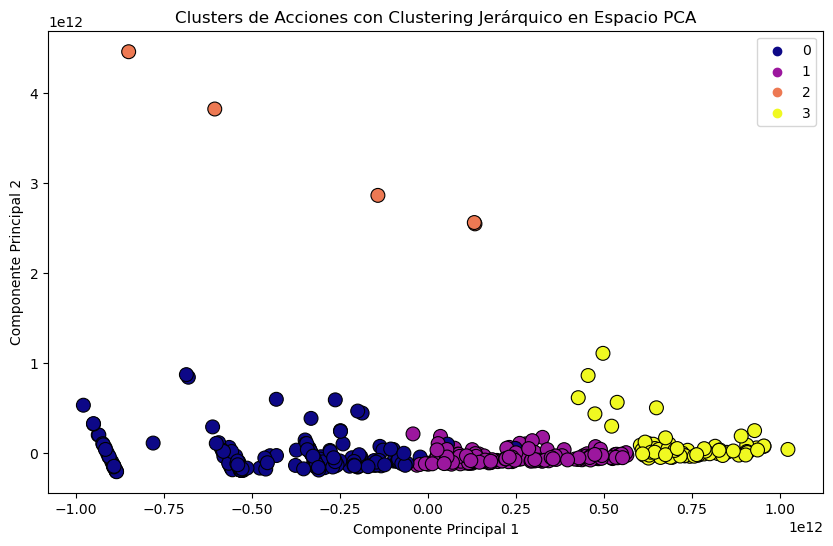

Varianza explicada por PC1: 57.96%
Varianza explicada por PC2: 37.38%
Varianza total explicada: 95.35%


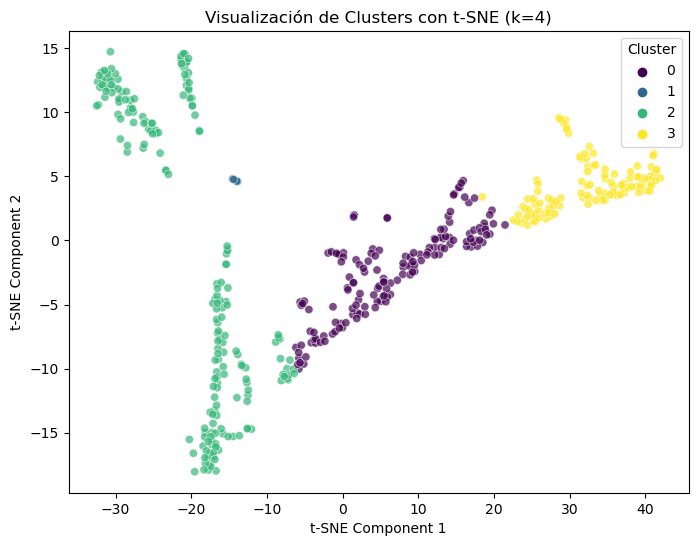

c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


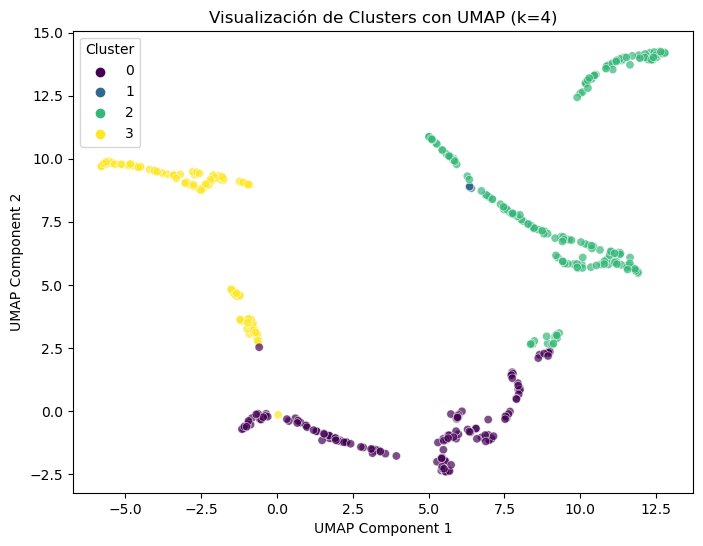

Clustering con K-Means, DBSCAN y Jerárquico completado y guardado.


In [18]:
# Notebook 4: Clustering de Acciones (K-Means, DBSCAN y Jerárquico)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Cargar las features procesadas
features = ["fullTimeEmployees","auditRisk","overallRisk","dividendYield","payoutRatio","fiveYearAvgDividendYield","beta","forwardPE","averageVolume","marketCap","ebitdaMargins","earningsGrowth","returnOnEquity"]
# features = df[features]
features =numerical_columns.copy()
# Determinar número óptimo de clusters con el método del codo
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para Selección de K")
plt.show()

# Determinar número óptimo de clusters con el coeficiente de silueta
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Número de Clusters")
plt.ylabel("Puntuación de Silueta")
plt.title("Coeficiente de Silueta por Número de Clusters")
plt.show()

# Aplicar K-Means con el número óptimo de clusters (suponiendo K=4 basado en los gráficos)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
features['Cluster_KMeans'] = kmeans.fit_predict(features)

# Aplicar DBSCAN para clustering basado en densidad
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Ajustar eps según los datos
features['Cluster_DBSCAN'] = dbscan.fit_predict(features)

# Aplicar Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
features['Cluster_Hierarchical'] = hierarchical.fit_predict(features)

# Visualización de clusters con PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN', 'Cluster_Hierarchical']))
features['PCA1'] = pca_result[:, 0]
features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=features, palette='viridis', s=100, edgecolor='black')
plt.title("Clusters de Acciones con K-Means en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_DBSCAN', data=features, palette='coolwarm', s=100, edgecolor='black')
plt.title("Clusters de Acciones con DBSCAN en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', data=features, palette='plasma', s=100, edgecolor='black')
plt.title("Clusters de Acciones con Clustering Jerárquico en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Ver la varianza explicada por PCA
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2%}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2%}")
print(f"Varianza total explicada: {sum(explained_variance):.2%}")


# Reducir a 2 dimensiones con t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features)
clusters = kmeans.labels_

# Graficar t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=clusters , palette="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title(f"Visualización de Clusters con t-SNE (k={4})")
plt.legend(title="Cluster")
plt.show()





# Reducir a 2 dimensiones con UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
features_umap = umap_model.fit_transform(features)

# Graficar UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_umap[:, 0], y=features_umap[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title(f"Visualización de Clusters con UMAP (k={4})")
plt.legend(title="Cluster")
plt.show()

# Guardar los resultados de clustering
features.to_csv("features_clusters_comparacion.csv")

print("Clustering con K-Means, DBSCAN y Jerárquico completado y guardado.")